In [1]:
import pandas as pd
import numpy as np

In [2]:
from imblearn.datasets import fetch_datasets

dataset = fetch_datasets()

In [3]:
dataset.keys()

odict_keys(['ecoli', 'optical_digits', 'satimage', 'pen_digits', 'abalone', 'sick_euthyroid', 'spectrometer', 'car_eval_34', 'isolet', 'us_crime', 'yeast_ml8', 'scene', 'libras_move', 'thyroid_sick', 'coil_2000', 'arrhythmia', 'solar_flare_m0', 'oil', 'car_eval_4', 'wine_quality', 'letter_img', 'yeast_me2', 'webpage', 'ozone_level', 'mammography', 'protein_homo', 'abalone_19'])

In [4]:
X = dataset['ecoli']['data']
y = dataset['ecoli']['target']

In [5]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


Following code is from https://www.datacamp.com/community/tutorials/introduction-t-sne?utm_source=adwords_ppc&utm_campaignid=9942305733&utm_adgroupid=100189364546&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=229765585183&utm_targetid=dsa-929501846124&utm_loc_interest_ms=&utm_loc_physical_ms=1007850&gclid=EAIaIQobChMIkJrA7_LR6gIVB-ztCh113Q-ZEAAYASAAEgIVmvD_BwE

In [6]:
import time
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [7]:
# Utility function to visualize the outputs of PCA and t-SNE based on https://www.datacamp.com/community/tutorials/introduction-t-sne?utm_source=adwords_ppc&utm_campaignid=9942305733&utm_adgroupid=100189364546&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=229765585183&utm_targetid=dsa-929501846124&utm_loc_interest_ms=&utm_loc_physical_ms=1007850&gclid=EAIaIQobChMIkJrA7_LR6gIVB-ztCh113Q-ZEAAYASAAEgIVmvD_BwE

def plot_scatter(name, x, y):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(y))
    
    # just adding two 
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')

    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[y.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    ax.set_title(name)

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[y == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [8]:


time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

PCA done! Time elapsed: 0.03181314468383789 seconds
Variance explained per principal component: [0.5161681  0.2442034  0.08419874 0.07413522]


In [9]:
def plot_pca(dataset_name, X, y):
    
    # get PCA for first four components
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X)
    
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    
    # use 0 and 1 for the class instead of -1 and 1
    y_abs = np.array([0 if yval < 0 else yval for yval in y.values])
    
    print('Variance explained per principal component: {}\n'.format(pca.explained_variance_ratio_))
    
    # plot the first two components:
    primary_components = pd.DataFrame(pca_result)[[0,1]]
    plot_scatter(dataset_name, primary_components.values, y_abs) 
    
    plt.plot()
    print

def plot_dataset(dataset_name, X, y):
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X)
    plot_pca(dataset_name, X, y)
    
    
def investigate_dataset(dataset_name, dataset):
    
    print('Dataset: ', dataset_name)
    
    print('X summary: ', dataset_name)
    X = pd.DataFrame(dataset[dataset_name]['data'])
    y = pd.DataFrame(dataset[dataset_name]['target'])
    
    # give example of dataframe, and then describe it
    
    display(X.head())
    display(X.describe())
    
    print('y summary: ', dataset_name)
    display(y.head())
    display(y.describe())
    
    plot_dataset(dataset_name, X, y)
    
    
    

Dataset:  ecoli
X summary:  ecoli


,0,1,2,3,4,5,6
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35


,0,1,2,3,4,5,6
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


y summary:  ecoli


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,336.000000
mean,-0.791667
std,0.611864
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.5161681  0.2442034  0.08419874 0.07413522]

Dataset:  optical_digits
X summary:  optical_digits


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,1.0,6.0,15.0,12.0,1.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,6.0,14.0,7.0,1.0,0.0,0.0
1,0.0,0.0,10.0,16.0,6.0,0.0,0.0,0.0,0.0,7.0,...,3.0,0.0,0.0,0.0,10.0,16.0,15.0,3.0,0.0,0.0
2,0.0,0.0,8.0,15.0,16.0,13.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.0,14.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,3.0,11.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,15.0,2.0,0.0,0.0
4,0.0,0.0,5.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,4.0,12.0,14.0,7.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,5620.0,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,...,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000
mean,0.0,0.302135,5.393238,11.815480,11.578292,5.593772,1.379359,0.138256,0.003203,1.971174,...,3.737900,0.166904,0.000356,0.281851,5.760498,11.989680,11.572420,6.720819,2.093594,0.254093
std,0.0,0.879962,4.672719,4.255952,4.462546,5.631149,3.356633,1.046998,0.090423,3.098815,...,4.906909,0.843455,0.018863,0.929969,5.021145,4.347542,4.975675,5.815564,4.047959,1.418558
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,16.000000,...,16.000000,13.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


y summary:  optical_digits


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,5620.000000
mean,-0.802847
std,0.596238
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.14513775 0.13517068 0.11916766 0.08289567]

Dataset:  satimage
X summary:  satimage


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,92.0,115.0,120.0,94.0,84.0,102.0,106.0,79.0,84.0,102.0,...,134.0,104.0,88.0,121.0,128.0,100.0,84.0,107.0,113.0,87.0
1,84.0,102.0,106.0,79.0,84.0,102.0,102.0,83.0,80.0,102.0,...,128.0,100.0,84.0,107.0,113.0,87.0,84.0,99.0,104.0,79.0
2,84.0,102.0,102.0,83.0,80.0,102.0,102.0,79.0,84.0,94.0,...,113.0,87.0,84.0,99.0,104.0,79.0,84.0,99.0,104.0,79.0
3,80.0,102.0,102.0,79.0,84.0,94.0,102.0,79.0,80.0,94.0,...,104.0,79.0,84.0,99.0,104.0,79.0,84.0,103.0,104.0,79.0
4,84.0,94.0,102.0,79.0,80.0,94.0,98.0,76.0,80.0,102.0,...,104.0,79.0,84.0,103.0,104.0,79.0,79.0,107.0,109.0,87.0


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,...,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,69.400000,83.594872,99.290598,82.592696,69.150272,83.243512,99.110645,82.497125,68.912354,82.893085,...,99.214763,82.660606,68.944056,83.145610,99.111888,82.618026,68.727584,82.858897,98.926030,82.505361
std,13.605871,22.882234,16.645944,18.897674,13.561197,22.886495,16.664088,18.940923,13.470599,22.862255,...,16.612514,18.991281,13.492684,22.847199,16.704305,19.043661,13.401603,22.816959,16.695488,19.054274
min,39.000000,27.000000,53.000000,33.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000
25%,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000
50%,68.000000,87.000000,101.000000,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,100.000000,81.000000,68.000000,85.000000,100.000000,81.000000,67.000000,84.000000,100.000000,81.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,102.000000,...,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000
max,104.000000,137.000000,140.000000,154.000000,104.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,140.000000,154.000000,104.000000,130.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000


y summary:  satimage


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,6435.000000
mean,-0.805439
std,0.592725
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.47587518 0.38861389 0.03336536 0.02358427]

Dataset:  pen_digits
X summary:  pen_digits


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,47.0,100.0,27.0,81.0,57.0,37.0,26.0,0.0,0.0,23.0,56.0,53.0,100.0,90.0,40.0,98.0
1,0.0,89.0,27.0,100.0,42.0,75.0,29.0,45.0,15.0,15.0,37.0,0.0,69.0,2.0,100.0,6.0
2,0.0,57.0,31.0,68.0,72.0,90.0,100.0,100.0,76.0,75.0,50.0,51.0,28.0,25.0,16.0,0.0
3,0.0,100.0,7.0,92.0,5.0,68.0,19.0,45.0,86.0,34.0,100.0,45.0,74.0,23.0,67.0,0.0
4,0.0,67.0,49.0,83.0,100.0,100.0,81.0,80.0,60.0,60.0,40.0,40.0,33.0,20.0,47.0,0.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,38.814320,85.120269,40.605622,83.774199,49.770378,65.573144,51.220251,44.498999,56.868541,33.695961,60.516376,34.826510,55.022289,34.937045,47.287482,28.845342
std,34.257783,16.218571,26.342984,19.163646,34.100515,26.996688,30.576881,29.906104,34.135530,27.251548,37.288086,27.119982,22.335539,33.155463,41.760400,35.778094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,76.000000,20.000000,72.000000,18.000000,49.000000,28.000000,23.000000,29.000000,7.000000,23.000000,11.000000,42.000000,5.000000,0.000000,0.000000
50%,32.000000,89.000000,40.000000,91.000000,53.000000,71.000000,53.500000,43.000000,60.000000,33.000000,73.000000,30.000000,53.000000,27.000000,40.000000,9.000000
75%,65.000000,100.000000,58.000000,100.000000,78.000000,86.000000,74.000000,64.000000,89.000000,54.000000,97.000000,55.000000,68.000000,47.000000,100.000000,51.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


y summary:  pen_digits


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,10992.000000
mean,-0.808042
std,0.589151
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.28327934 0.24888254 0.15365307 0.09017046]

Dataset:  abalone
X summary:  abalone


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


,0,1,2,3,4,5,6,7,8,9
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.312904,0.321283,0.365813,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.463731,0.467025,0.481715,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.000000,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.000000,0.000000,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,1.000000,1.000000,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


y summary:  abalone


,0
0,-1
1,1
2,-1
3,-1
4,1


,0
count,4177.000000
mean,-0.812784
std,0.582634
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.51247125 0.33503016 0.14375661 0.00379859]

Dataset:  sick_euthyroid
X summary:  sick_euthyroid


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,72.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,83.0,0.0,1.0,0.95,0.0,1.0,87.0,1.0,0.0
1,45.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,82.0,0.0,1.0,0.73,0.0,1.0,112.0,1.0,0.0
2,64.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,101.0,0.0,1.0,0.82,0.0,1.0,123.0,1.0,0.0
3,56.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,76.0,0.0,1.0,0.77,0.0,1.0,99.0,1.0,0.0
4,78.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,87.0,0.0,1.0,0.95,0.0,1.0,91.0,1.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,...,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,50.559911,0.689851,0.287069,0.854252,0.145748,0.982611,0.017389,0.986721,0.013279,0.967120,...,0.921277,111.486184,0.078407,0.921593,0.986105,0.078090,0.921910,119.808599,0.917800,0.082200
std,20.589843,0.462627,0.452466,0.352909,0.352909,0.130735,0.130735,0.114483,0.114483,0.178351,...,0.269348,51.575342,0.268853,0.268853,0.261087,0.268356,0.268356,75.032080,0.274713,0.274713
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,83.000000,0.000000,1.000000,0.850000,0.000000,1.000000,90.000000,1.000000,0.000000
50%,53.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,104.000000,0.000000,1.000000,0.960000,0.000000,1.000000,108.000000,1.000000,0.000000
75%,67.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,130.000000,0.000000,1.000000,1.080000,0.000000,1.000000,132.000000,1.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,450.000000,1.000000,1.000000,2.210000,1.000000,1.000000,881.000000,1.000000,1.000000


y summary:  sick_euthyroid


,0
0,1
1,1
2,1
3,1
4,1


,0
count,3163.000000
mean,-0.814733
std,0.579928
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.65785658 0.17184898 0.12850902 0.04134443]

Dataset:  spectrometer
X summary:  spectrometer


,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,4119.1675,4897.2990,4163.9690,5000.7207,5769.1810,6097.5083,5659.4453,6674.6147,7179.8270,9152.5100,...,1669.9149,2039.33590,1891.61340,1040.1157,1211.53580,1767.6233,1146.94710,1392.47450,1278.9945,1440.48200
1,7660.9990,7906.7840,7821.8984,7240.5156,6555.7860,6364.1265,5450.4020,5325.7190,4858.7485,4209.9604,...,6879.9707,7056.40530,6817.42970,6682.7944,6988.59770,7084.0360,6971.78300,7015.57470,6962.2200,6263.44000
2,3196.4287,3013.9722,3003.1490,3099.5684,3130.7747,3287.7385,3371.3590,3405.3242,3451.8127,3507.8682,...,7048.2163,6998.41550,6669.61100,6551.0590,6679.77150,6564.2630,6309.63960,5954.38800,5337.8887,4638.52440
3,26028.4510,23706.8140,21255.0660,19268.2970,17711.9700,16660.4730,15168.0050,14472.5940,13418.5690,12521.3300,...,523.3729,507.43262,446.32816,417.1043,454.29834,448.9849,459.61176,409.13416,366.6267,332.08942
4,15835.3850,15097.6970,14774.4180,15353.4850,13989.9070,12910.5310,12632.6430,12481.2230,10711.8570,10101.6820,...,1083.3488,664.50507,909.68350,837.5338,862.60760,693.2511,890.75964,473.78302,658.4614,725.74945


,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,...,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,12541.209977,12237.597084,11964.908625,11537.682054,11101.733085,10819.116949,10424.391799,10280.070452,10106.088973,9997.747461,...,1499.086577,1470.316049,1373.166665,1337.208231,1351.122308,1322.631461,1272.709845,1253.114792,1194.701758,1073.420104
std,5503.167939,5031.317252,4585.085725,4052.584520,3538.717489,3050.139611,2609.524039,2306.188850,2152.268537,2173.905628,...,1166.431699,1180.199059,1130.613602,1143.967066,1180.336500,1178.018265,1157.282074,1170.577250,1123.733151,968.482164
min,-460.896450,287.154570,1654.362800,599.764200,1561.761600,1680.023400,1865.629800,1476.868800,1215.385900,565.382930,...,306.999000,194.543260,182.580570,216.444440,-15.282752,114.827950,264.006200,164.322250,-17.147625,110.874400
25%,8074.148750,8001.957200,8148.328250,8201.155500,8484.753500,8746.968000,8956.825000,9232.578500,9327.731000,9234.500500,...,929.767050,892.985520,817.332930,776.278075,783.377935,760.454915,714.886730,699.183750,662.240450,597.853715
50%,11878.322000,11915.940000,11723.886000,11292.897000,10760.883000,10529.428000,10292.296000,10278.835000,10391.324000,10375.595000,...,1231.855600,1201.621300,1106.895400,1058.174400,1094.039200,1045.647600,988.230500,973.379400,921.598750,839.561100
75%,15377.557500,15163.935000,15018.602000,14348.957500,13594.444500,12858.561500,12076.403000,11664.955000,11303.750500,11300.875500,...,1600.355200,1554.170750,1462.659200,1408.338200,1376.312700,1357.530650,1338.485050,1297.319450,1232.466100,1122.141550
max,34736.387000,36548.805000,34748.820000,29966.598000,23261.822000,18706.330000,18211.516000,17742.465000,16431.188000,15360.049000,...,8707.854000,8648.441000,8189.396500,8672.912000,8748.417000,9028.503000,8661.756000,8855.052000,8426.325000,7169.083000


y summary:  spectrometer


,0
0,-1
1,1
2,1
3,-1
4,-1


,0
count,531.000000
mean,-0.830508
std,0.557531
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.51071081 0.39728924 0.03835621 0.02469603]

Dataset:  car_eval_34
X summary:  car_eval_34


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,...,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,...,0.250000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,...,0.433138,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,...,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


y summary:  car_eval_34


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,1728.000000
mean,-0.844907
std,0.535067
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.07843137 0.07843137 0.07843137 0.07843137]

Dataset:  isolet
X summary:  isolet


,0,1,2,3,4,5,6,7,8,9,...,607,608,609,610,611,612,613,614,615,616
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.3334,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.2272,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,0.0952,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,0.0648,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.2812,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500


,0,1,2,3,4,5,6,7,8,9,...,607,608,609,610,611,612,613,614,615,616
count,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,...,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000
mean,-0.385396,0.141103,0.347384,0.450659,0.324283,0.163589,0.023852,-0.081577,-0.149191,-0.191763,...,0.370768,0.341730,0.311678,0.318904,0.334451,0.299238,0.224122,0.186668,0.081370,-0.281416
std,0.236721,0.320090,0.326658,0.308301,0.461491,0.569970,0.559704,0.535142,0.528714,0.515343,...,0.335582,0.330835,0.328813,0.333747,0.334954,0.334282,0.336135,0.337780,0.332859,0.354418
min,-1.000000,-0.892600,-0.975200,-0.968000,-0.996600,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.609400,-0.803400,-0.775200,-0.830200,-0.711800,-0.770800,-0.810600,-0.780200,-0.802800,-0.962600
25%,-0.546800,-0.099400,0.105400,0.247800,-0.024800,-0.359600,-0.461600,-0.526800,-0.577400,-0.601200,...,0.130400,0.098000,0.071400,0.073600,0.088600,0.049200,-0.017800,-0.057600,-0.154600,-0.546600
50%,-0.414000,0.106400,0.333400,0.453200,0.415800,0.204200,-0.010800,-0.154400,-0.233200,-0.261000,...,0.366200,0.337400,0.294200,0.295000,0.315800,0.280000,0.192400,0.157800,0.045200,-0.329000
75%,-0.241000,0.354600,0.583400,0.668600,0.692400,0.686200,0.492400,0.304400,0.190200,0.120000,...,0.622600,0.588800,0.548800,0.565800,0.581600,0.541200,0.461600,0.410800,0.289800,-0.065600
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.889800


y summary:  isolet


,0
0,1
1,1
2,1
3,1
4,-1


,0
count,7797.000000
mean,-0.846095
std,0.533067
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.24964919 0.08842485 0.06276102 0.04553229]

Dataset:  us_crime
X summary:  us_crime


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


y summary:  us_crime


,0
0,-1
1,1
2,-1
3,-1
4,-1


,0
count,1994.000000
mean,-0.849549
std,0.527643
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.26765027 0.18787521 0.08239528 0.07096256]

Dataset:  yeast_ml8
X summary:  yeast_ml8


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,0.043477,...,0.039048,-0.018712,-0.034711,-0.038675,-0.039102,0.017429,-0.052659,-0.042402,0.118473,0.125632
1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,-0.055544,...,-0.001198,0.030594,-0.021814,0.010430,-0.013809,-0.009248,-0.027318,-0.014191,0.022783,0.123785
2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,-0.053756,...,0.195777,0.022294,0.012583,0.002233,-0.002072,-0.010981,0.007615,-0.063378,-0.084181,-0.034402
3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,-0.123053,...,0.001189,-0.066241,-0.046999,-0.066604,-0.055773,-0.041941,0.051066,0.004976,0.193972,0.131866
4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,-0.111348,...,-0.035045,-0.080882,0.028468,-0.073576,0.050630,0.084832,-0.019570,-0.021650,-0.068326,-0.091155


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,0.001173,-0.000436,-0.000257,0.000265,0.001228,0.000475,0.001107,0.000420,0.001076,-0.000009,...,-0.000773,0.000464,-0.000515,0.000667,0.000324,-0.001483,-0.001047,-0.001539,0.000284,0.007605
std,0.097411,0.097885,0.097746,0.096969,0.096909,0.097306,0.097170,0.096803,0.096326,0.096805,...,0.093316,0.096684,0.096209,0.096635,0.096280,0.094369,0.096900,0.094211,0.093154,0.099368
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.226420,-0.225374,-0.501572,-0.236589,-0.267052,-0.194079,-0.237752
25%,-0.053655,-0.058734,-0.057526,-0.057149,-0.058461,-0.060212,-0.058445,-0.062849,-0.063472,-0.065010,...,-0.054133,-0.056415,-0.056414,-0.059382,-0.058025,-0.053591,-0.063318,-0.059542,-0.054078,-0.077191
50%,0.003649,-0.003513,0.002892,-0.000153,0.005565,0.000321,0.006179,0.001436,0.003515,0.002432,...,-0.012893,-0.023595,-0.024313,-0.023059,-0.021942,-0.018216,-0.033623,-0.023519,-0.012007,0.022126
75%,0.057299,0.048047,0.061007,0.054522,0.066286,0.059908,0.068892,0.061418,0.064958,0.063096,...,0.027977,0.034937,0.036057,0.041430,0.035730,0.019583,0.038901,0.025408,0.028087,0.103185
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.542867,0.547134,0.385928,0.540493,0.569250,0.509963,0.587358,0.700340,0.163431


y summary:  yeast_ml8


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,2417.000000
mean,-0.852710
std,0.522493
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.11037397 0.06918929 0.06601565 0.05275227]

Dataset:  scene
X summary:  scene


,0,1,2,3,4,5,6,7,8,9,...,284,285,286,287,288,289,290,291,292,293
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.061538,0.049615,0.068962,0.653879,0.354982,0.124074,0.157332,0.247298,0.014025,0.029709
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.114123,0.160008,0.414088,0.361843,0.303399,0.176387,0.251454,0.137833,0.082672,0.036320
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.047596,0.038082,0.079977,0.004901,0.003460,0.006049,0.017166,0.051125,0.112506,0.083924
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.027527,0.016922,0.024174,0.036799,0.007694,0.009735,0.019267,0.031290,0.049780,0.090959
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.158730,0.023177,0.129994,0.167709,0.226580,0.218534,0.198151,0.238796,0.164270,0.184290


,0,1,2,3,4,5,6,7,8,9,...,284,285,286,287,288,289,290,291,292,293
count,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,...,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000
mean,0.658669,0.694148,0.715307,0.721717,0.713643,0.690993,0.653925,0.652328,0.686060,0.707412,...,0.148694,0.142269,0.135349,0.114879,0.116989,0.118997,0.119322,0.117860,0.112393,0.110179
std,0.213751,0.198882,0.188399,0.185636,0.187857,0.200794,0.219823,0.198750,0.180039,0.168036,...,0.176388,0.170977,0.169214,0.155198,0.157281,0.160983,0.159064,0.156272,0.149826,0.149425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.534945,0.578996,0.612401,0.614904,0.608947,0.583404,0.531731,0.540349,0.577471,0.607320,...,0.032728,0.029458,0.027336,0.019109,0.019545,0.021166,0.021149,0.020905,0.021072,0.019841
50%,0.681079,0.718068,0.737771,0.743758,0.734662,0.716582,0.685605,0.677021,0.707229,0.723166,...,0.086810,0.081752,0.074380,0.058819,0.060276,0.059569,0.063346,0.063062,0.059217,0.056948
75%,0.819445,0.843483,0.857111,0.863527,0.854056,0.840869,0.817084,0.791899,0.819788,0.831932,...,0.192630,0.190864,0.173670,0.145307,0.148679,0.154305,0.155334,0.153047,0.138648,0.137369
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


y summary:  scene


,0
0,1
1,1
2,-1
3,-1
4,-1


,0
count,2407.000000
mean,-0.852929
std,0.522135
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.18889299 0.10318487 0.06421824 0.04870064]

Dataset:  libras_move
X summary:  libras_move


,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.79691,0.38194,0.79691,0.37731,0.79884,0.37731,0.79497,0.37731,0.77563,0.35417,...,0.34043,0.51389,0.39845,0.42593,0.47389,0.36111,0.55899,0.31250,0.63830,0.29398
1,0.67892,0.27315,0.68085,0.27315,0.68085,0.27315,0.68085,0.27315,0.67892,0.26852,...,0.19536,0.57407,0.17795,0.63657,0.17215,0.67361,0.17021,0.69213,0.17215,0.69213
2,0.72147,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,...,0.52031,0.30556,0.59768,0.25926,0.67118,0.25231,0.73501,0.26620,0.78143,0.27778
3,0.56480,0.32407,0.56286,0.32407,0.56093,0.32407,0.55899,0.32407,0.55899,0.32407,...,0.20503,0.49074,0.26306,0.42361,0.33269,0.34722,0.41006,0.28009,0.49130,0.24306
4,0.67118,0.38426,0.67118,0.38657,0.67311,0.38657,0.67311,0.38426,0.67311,0.37963,...,0.46422,0.76389,0.44101,0.64120,0.45068,0.54167,0.47776,0.44213,0.53191,0.34259


,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.566613,0.555967,0.566377,0.555478,0.565640,0.554552,0.564867,0.552855,0.563094,0.548579,...,0.486933,0.474814,0.487229,0.469181,0.488287,0.464905,0.490259,0.463760,0.492376,0.463767
std,0.198916,0.187485,0.198306,0.187320,0.197863,0.187066,0.195968,0.186777,0.192667,0.185901,...,0.208567,0.172685,0.209880,0.174674,0.213416,0.178629,0.218753,0.184384,0.225507,0.190831
min,0.090909,0.148150,0.085106,0.148150,0.085106,0.148150,0.088975,0.145830,0.092843,0.145830,...,0.059961,0.076389,0.059961,0.050926,0.029014,0.030093,0.011605,0.009259,0.005803,0.006944
25%,0.444875,0.407410,0.440043,0.409720,0.438588,0.407410,0.437140,0.409720,0.435688,0.409720,...,0.326890,0.354170,0.327370,0.346642,0.329785,0.342590,0.319630,0.332753,0.313350,0.328122
50%,0.585105,0.581020,0.585105,0.582175,0.582205,0.582175,0.579305,0.564815,0.572535,0.556715,...,0.476790,0.486110,0.481620,0.483800,0.474855,0.483800,0.479690,0.482640,0.487430,0.488430
75%,0.720023,0.724540,0.721952,0.720488,0.720505,0.722220,0.720023,0.718170,0.714215,0.719910,...,0.652323,0.597800,0.654737,0.594910,0.656675,0.592590,0.667310,0.608800,0.671662,0.615740
max,0.932300,0.886570,0.930370,0.888890,0.932300,0.884260,0.932300,0.881940,0.932300,0.875000,...,0.961320,0.831020,0.970990,0.819440,0.978720,0.824070,0.988390,0.872690,1.000000,0.884260


y summary:  libras_move


,0
0,1
1,1
2,1
3,1
4,1


,0
count,360.000000
mean,-0.866667
std,0.499582
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.25096891 0.22059426 0.18093574 0.10480392]

Dataset:  thyroid_sick
X summary:  thyroid_sick


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,41.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.14,0.0,1.0,109.0,1.0,0.0,0.0,1.0,0.0,0.0
1,23.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.31,1.0,0.0,88.0,1.0,1.0,0.0,0.0,0.0,0.0
2,46.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.91,0.0,1.0,120.0,1.0,1.0,0.0,0.0,0.0,0.0
3,70.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.20,1.0,0.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0
4,70.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.87,0.0,1.0,70.0,1.0,0.0,0.0,0.0,0.0,1.0


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.0,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.613998,0.657476,0.302757,0.876988,0.123012,0.986744,0.013256,0.988600,0.011400,0.961029,...,1.009051,0.102068,0.897932,111.792100,1.0,0.583510,0.029692,0.102333,0.010339,0.274125
std,18.995456,0.474617,0.459512,0.328494,0.328494,0.114382,0.114382,0.106174,0.106174,0.193552,...,0.234970,0.302778,0.302778,40.177451,0.0,0.493042,0.169760,0.303126,0.101169,0.446131
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.000000,0.000000,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.870000,0.000000,1.000000,92.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.980000,0.000000,1.000000,107.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,67.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.100000,0.000000,1.000000,126.250000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000
max,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.320000,1.000000,1.000000,395.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


y summary:  thyroid_sick


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,3772.000000
mean,-0.877519
std,0.479606
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.54360553 0.20785795 0.1713546  0.07622819]

Dataset:  coil_2000
X summary:  coil_2000


,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,33.0,1.0,3.0,2.0,8.0,0.0,5.0,1.0,3.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,37.0,1.0,2.0,2.0,8.0,1.0,4.0,1.0,4.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.079821,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.384431,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.00000,2.000000,2.000000


y summary:  coil_2000


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,9822.000000
mean,-0.880676
std,0.473743
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.59481297 0.09624873 0.0389691  0.02925824]

Dataset:  arrhythmia
X summary:  arrhythmia


,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.500000,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,-0.200000,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000


y summary:  arrhythmia


,0
0,-1
1,1
2,-1
3,-1
4,-1


,0
count,452.000000
mean,-0.889381
std,0.457674
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.15911902 0.10575981 0.09226787 0.09009406]

Dataset:  solar_flare_m0
X summary:  solar_flare_m0


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,...,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,0.152628,0.206623,0.235421,0.083513,0.036717,0.285097,0.199424,0.027358,0.067675,0.184305,...,0.040317,0.950324,0.395968,0.604032,0.892009,0.107991,0.025918,0.974082,0.175666,0.824334
std,0.359758,0.405029,0.424415,0.276756,0.188134,0.451623,0.399711,0.163183,0.251277,0.387873,...,0.196772,0.217353,0.489234,0.489234,0.310481,0.310481,0.158948,0.158948,0.380673,0.380673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


y summary:  solar_flare_m0


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,1389.000000
mean,-0.902088
std,0.431708
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.18494422 0.17079714 0.10891319 0.07667719]

Dataset:  oil
X summary:  oil


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1.0,2558.0,1506.09,456.63,90.0,6395000.0,40.88,7.89,29780.0,0.19,...,69.0,2850.00,1000.00,763.16,135.46,3.73,0.0,33243.19,65.74,7.95
1,2.0,22325.0,79.11,841.03,180.0,55812500.0,51.11,1.21,61900.0,0.02,...,69.0,5750.00,11500.00,9593.48,1648.80,0.60,0.0,51572.04,65.73,6.26
2,3.0,115.0,1449.85,608.43,88.0,287500.0,40.42,7.34,3340.0,0.18,...,69.0,1400.00,250.00,150.00,45.13,9.33,1.0,31692.84,65.81,7.84
3,4.0,1201.0,1562.53,295.65,66.0,3002500.0,42.40,7.97,18030.0,0.19,...,69.0,6041.52,761.58,453.21,144.97,13.33,1.0,37696.21,65.67,8.07
4,5.0,312.0,950.27,440.86,37.0,780000.0,41.43,7.03,3350.0,0.17,...,69.0,1320.04,710.63,512.54,109.16,2.58,0.0,29038.17,65.66,7.35


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,60.547492,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,13.838898,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,50.000000,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,55.000000,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,67.000000,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,86.000000,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000


y summary:  oil


,0
0,1
1,-1
2,1
3,1
4,-1


,0
count,937.000000
mean,-0.912487
std,0.409325
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [9.99995404e-01 3.15331616e-06 1.24711371e-06 8.09413766e-08]

Dataset:  car_eval_4
X summary:  car_eval_4


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,...,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,...,0.250000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,...,0.433138,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,...,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


y summary:  car_eval_4


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,1728.000000
mean,-0.924769
std,0.380640
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.07843137 0.07843137 0.07843137 0.07843137]

Dataset:  wine_quality
X summary:  wine_quality


,0,1,2,3,4,5,6,7,8,9,10
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


,0,1,2,3,4,5,6,7,8,9,10
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


y summary:  wine_quality


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,4898.000000
mean,-0.925276
std,0.379334
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [9.09657344e-01 7.93338631e-02 1.01542742e-02 5.06004450e-04]

Dataset:  letter_img
X summary:  letter_img


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.0,8.0,3.0,5.0,1.0,8.0,13.0,0.0,6.0,6.0,10.0,8.0,0.0,8.0,0.0,8.0
1,5.0,12.0,3.0,7.0,2.0,10.0,5.0,5.0,4.0,13.0,3.0,9.0,2.0,8.0,4.0,10.0
2,4.0,11.0,6.0,8.0,6.0,10.0,6.0,2.0,6.0,10.0,3.0,7.0,3.0,7.0,3.0,9.0
3,7.0,11.0,6.0,6.0,3.0,5.0,9.0,4.0,6.0,4.0,4.0,10.0,6.0,10.0,2.0,8.0
4,2.0,1.0,3.0,1.0,1.0,8.0,6.0,6.0,6.0,6.0,5.0,9.0,1.0,7.0,5.0,10.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


y summary:  letter_img


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,20000.000000
mean,-0.926600
std,0.376058
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.28676168 0.1506864  0.12506651 0.08751311]

Dataset:  yeast_me2
X summary:  yeast_me2


/home/mulcahym/anaconda3/envs/MScAI/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


,0,1,2,3,4,5,6,7
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22


,0,1,2,3,4,5,6,7
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


y summary:  yeast_me2


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,1484.000000
mean,-0.931267
std,0.364461
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.35257564 0.21323514 0.13436322 0.09428912]

Dataset:  webpage
X summary:  webpage


/home/mulcahym/anaconda3/envs/MScAI/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,...,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000
mean,0.034100,0.028350,0.043991,0.027487,0.038758,0.032979,0.043243,0.031426,0.028723,0.051811,...,0.000748,0.007159,0.016734,0.083784,0.176624,0.001294,0.029730,0.140828,0.168315,0.000805
std,0.181489,0.165972,0.205078,0.163500,0.193020,0.178583,0.203407,0.174469,0.167030,0.221649,...,0.027332,0.084310,0.128274,0.277067,0.381356,0.035947,0.169843,0.347849,0.374151,0.028363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


y summary:  webpage


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,34780.000000
mean,-0.943588
std,0.331126
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.1268456  0.04141923 0.03064639 0.02217827]

Dataset:  ozone_level
X summary:  ozone_level


/home/mulcahym/anaconda3/envs/MScAI/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,-15.5,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,-14.5,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,-15.9,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,-16.8,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,-19.3,0.24,6.07,-13.27,5600.0,-8.30,47.45,10100.0,-40.0,0.58


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
count,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,...,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000
mean,1.832492,1.770229,1.750749,1.739787,1.702445,1.735174,1.834188,2.185489,2.662539,2.933438,...,-10.596569,0.313805,9.861266,0.843013,5815.327287,10.097181,37.155856,10165.163644,0.201104,0.371771
std,1.446408,1.466924,1.450767,1.424397,1.387510,1.380579,1.389338,1.326948,1.359740,1.370602,...,3.988235,0.253983,9.611024,7.416524,83.568296,20.898417,11.487711,55.559933,39.999987,1.316962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,...,-24.800000,0.010000,-14.920000,-25.990000,5480.000000,-56.700000,-10.100000,9975.000000,-135.000000,0.000000
25%,0.700000,0.600000,0.600000,0.600000,0.600000,0.700000,0.800000,1.200000,1.700000,2.000000,...,-13.500000,0.100000,2.390000,-3.810000,5765.000000,-4.112500,31.787500,10130.000000,-20.000000,0.000000
50%,1.400000,1.400000,1.300000,1.300000,1.300000,1.400000,1.500000,2.000000,2.500000,2.800000,...,-10.200000,0.240000,9.180000,0.345000,5830.000000,14.225000,40.975000,10160.000000,0.000000,0.000000
75%,2.600000,2.500000,2.500000,2.500000,2.425000,2.400000,2.500000,3.000000,3.400000,3.800000,...,-7.300000,0.482500,16.762500,4.967500,5880.000000,28.100000,45.100000,10195.000000,20.000000,0.050000
max,7.500000,7.700000,7.100000,7.300000,7.200000,7.400000,7.400000,7.500000,9.200000,8.500000,...,-1.700000,1.000000,42.360000,30.420000,5965.000000,42.050000,59.150000,10350.000000,140.000000,20.650000


y summary:  ozone_level


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,2536.000000
mean,-0.942429
std,0.334472
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.56843963 0.23775919 0.07736929 0.03925613]

Dataset:  mammography
X summary:  mammography


/home/mulcahym/anaconda3/envs/MScAI/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


,0,1,2,3,4,5
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566


,0,1,2,3,4,5
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096536e-10,1.297595e-09,5.698113e-10,-2.435706e-09,-1.120680e-09,1.459483e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00


y summary:  mammography


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,11183.000000
mean,-0.953501
std,0.301404
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.40501236 0.20818947 0.16588271 0.10543556]

Dataset:  protein_homo
X summary:  protein_homo


/home/mulcahym/anaconda3/envs/MScAI/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,-8.0,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,-6.0,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,7.0,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,6.0,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,-14.0,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
count,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,...,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000,145751.000000
mean,61.163636,26.493998,0.181143,1.688414,18.291329,1820.215684,-0.004246,0.197883,1.012617,-73.721631,...,3.014058,1820.502381,0.026852,0.529559,0.263731,-64.705100,472.776172,0.472764,0.260545,0.191868
std,18.992332,4.531681,1.243171,31.923559,80.619727,1404.340700,1.028840,1.422739,20.642469,26.535989,...,61.157751,1689.145882,1.181414,1.649857,9.655652,36.776097,406.650658,1.073039,0.187473,0.499650
min,2.680000,12.000000,-3.860000,-144.000000,-1082.000000,-718.800000,-6.120000,-2.860000,-85.500000,-1082.000000,...,-319.000000,-668.000000,-7.780000,-10.000000,-63.000000,-322.000000,-509.200000,-20.000000,-0.550000,-1.910000
25%,47.950000,23.560000,-0.580000,-17.500000,-13.000000,1017.600000,-0.660000,-0.600000,-9.500000,-86.000000,...,-24.000000,862.350000,-0.720000,-0.550000,-5.000000,-82.000000,175.300000,-0.170000,0.140000,-0.100000
50%,62.400000,25.770000,0.100000,1.000000,11.000000,1530.800000,0.040000,0.030000,0.500000,-69.500000,...,1.000000,1435.300000,0.090000,0.390000,0.000000,-55.000000,377.900000,0.560000,0.260000,0.280000
75%,75.340000,28.570000,0.820000,19.500000,40.000000,2295.600000,0.700000,0.770000,10.500000,-56.500000,...,27.000000,2334.100000,0.830000,1.460000,5.000000,-38.000000,669.100000,1.210000,0.390000,0.580000
max,100.000000,100.000000,50.380000,1059.500000,3380.000000,52817.900000,5.990000,72.280000,973.500000,-23.000000,...,2508.000000,64129.400000,5.940000,18.850000,146.000000,0.000000,4197.900000,6.600000,1.000000,1.000000


y summary:  protein_homo


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,145751.000000
mean,-0.982216
std,0.187754
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.84628661 0.06604632 0.0251615  0.01762455]



/home/mulcahym/anaconda3/envs/MScAI/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


Dataset:  abalone_19
X summary:  abalone_19


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


,0,1,2,3,4,5,6,7,8,9
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.312904,0.321283,0.365813,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.463731,0.467025,0.481715,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.000000,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.000000,0.000000,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,1.000000,1.000000,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


y summary:  abalone_19


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,4177.000000
mean,-0.984678
std,0.174403
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.51247125 0.33503016 0.14375661 0.00379859]



/home/mulcahym/anaconda3/envs/MScAI/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


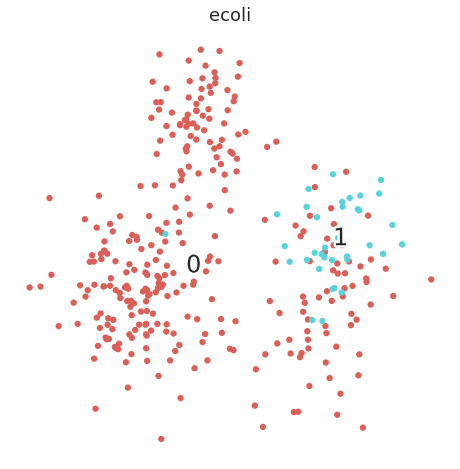

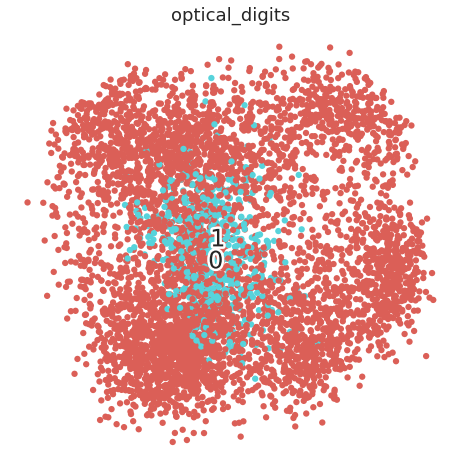

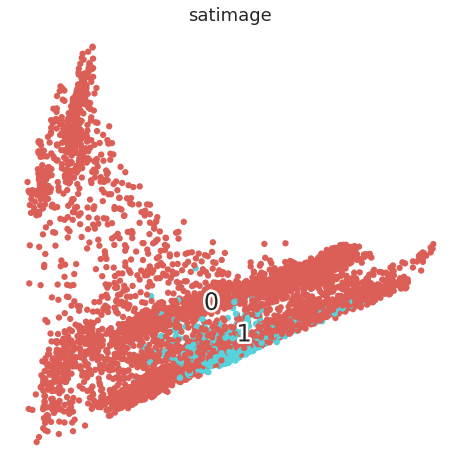

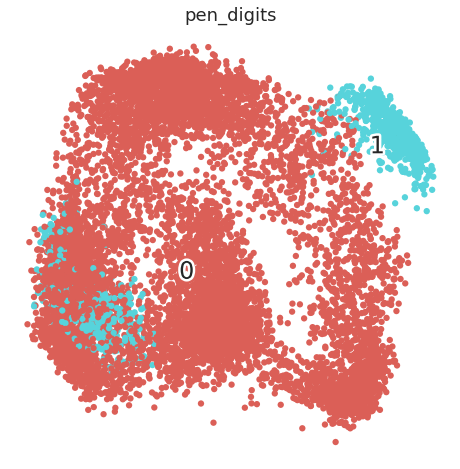

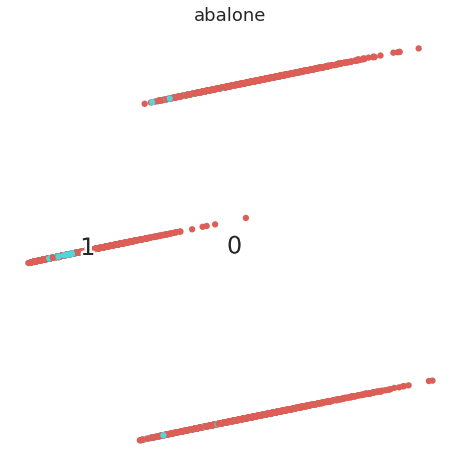

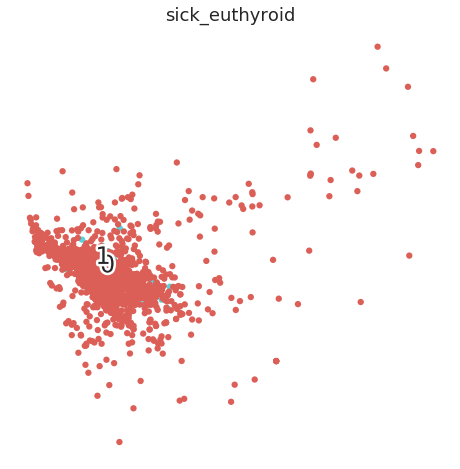

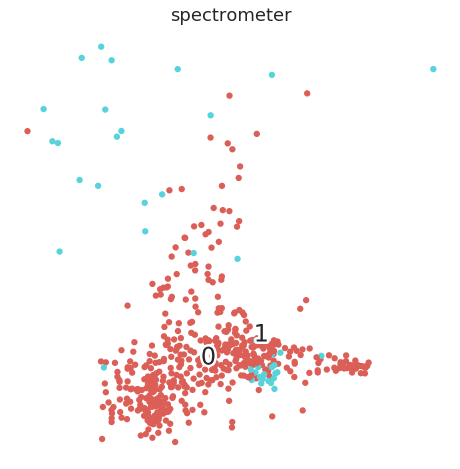

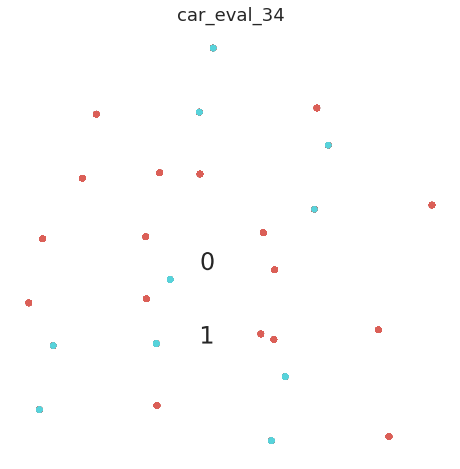

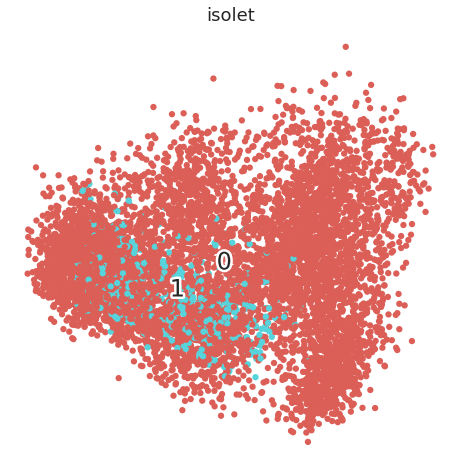

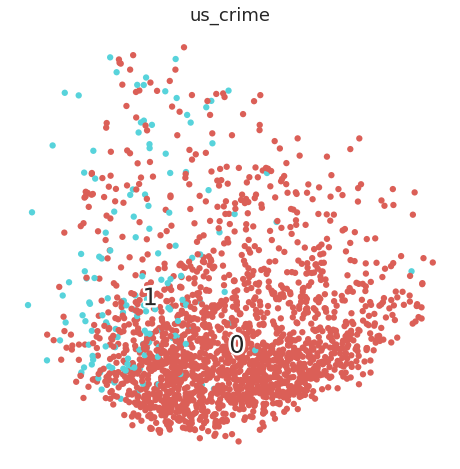

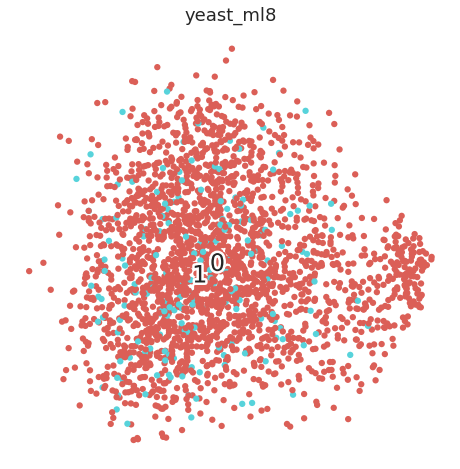

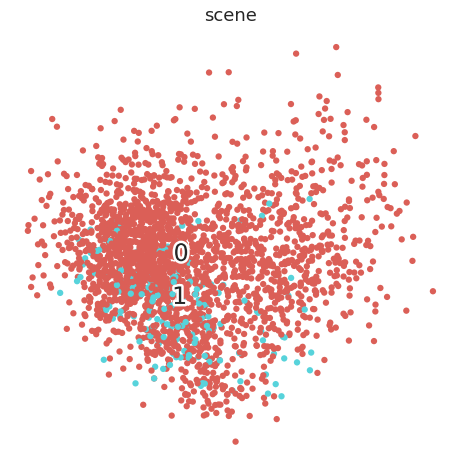

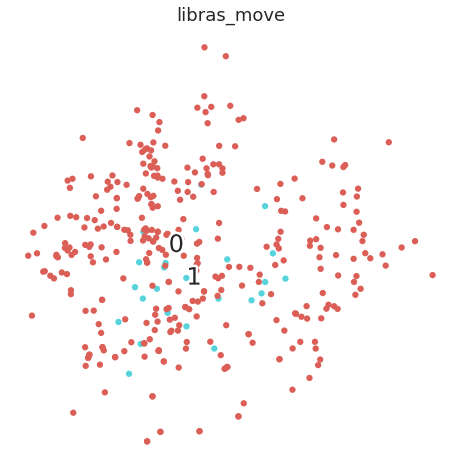

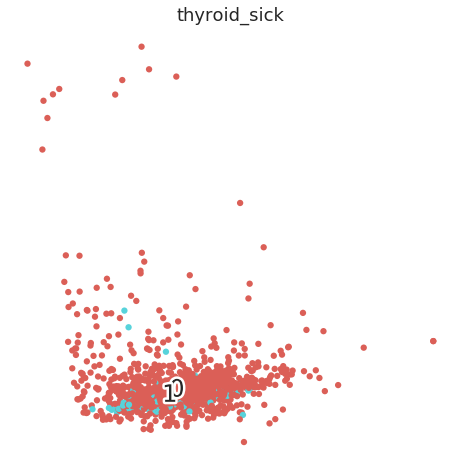

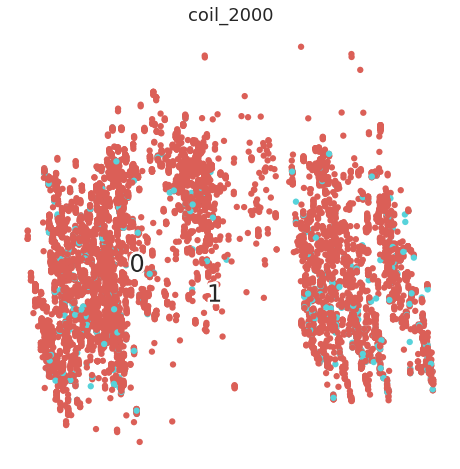

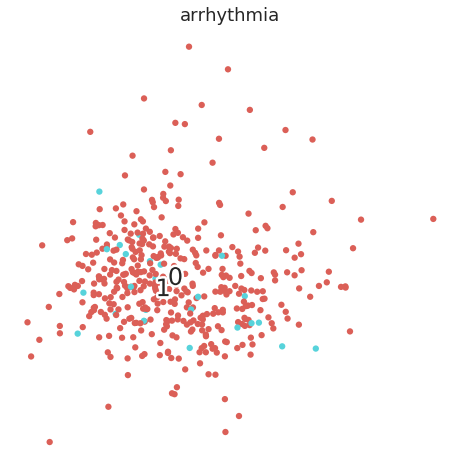

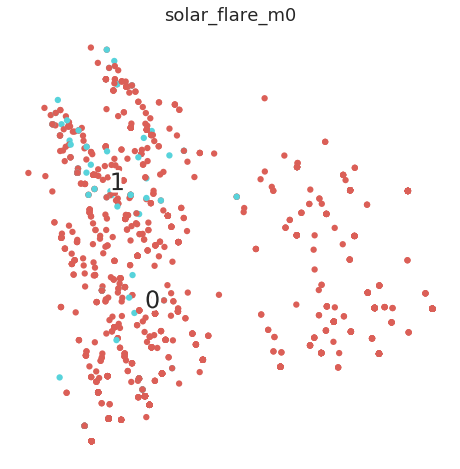

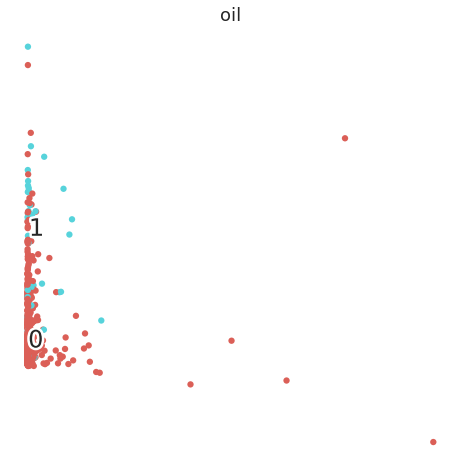

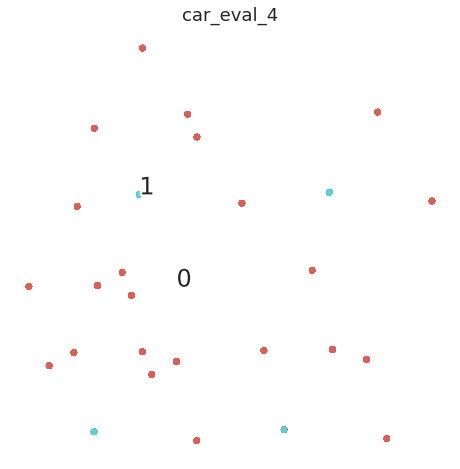

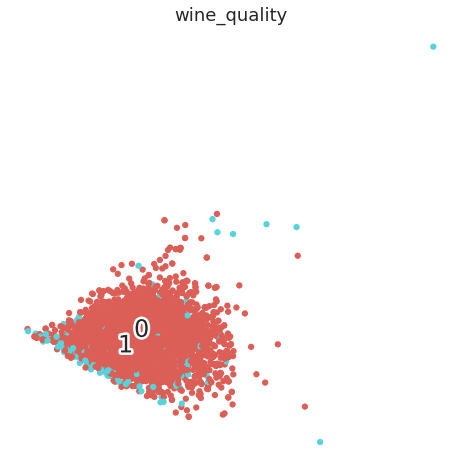

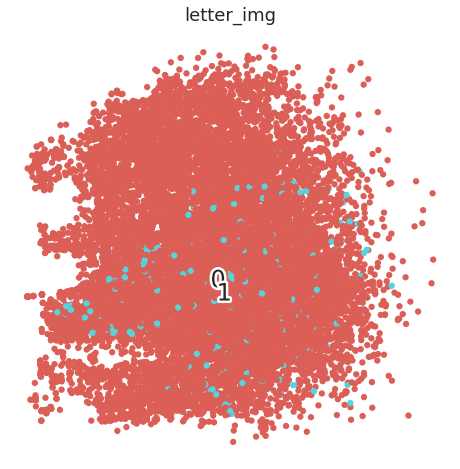

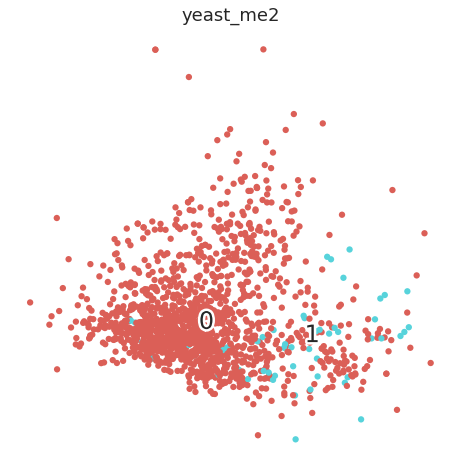

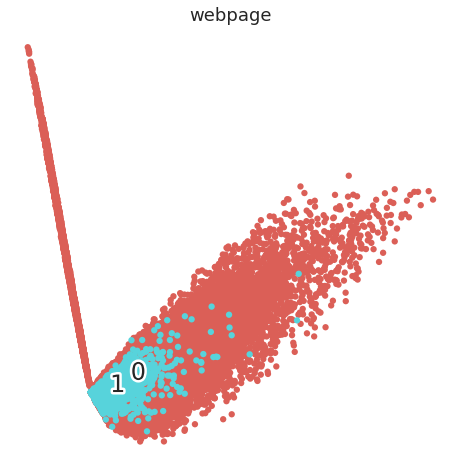

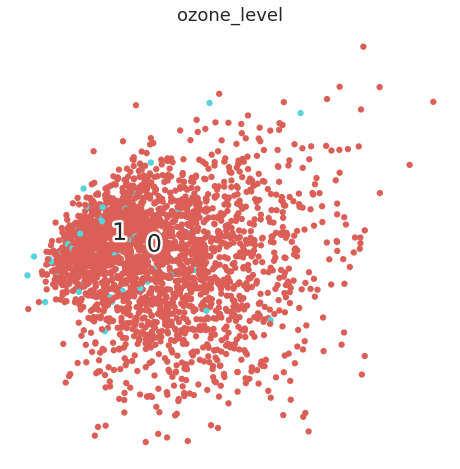

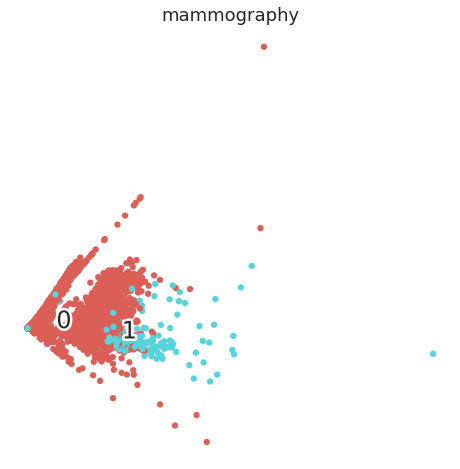

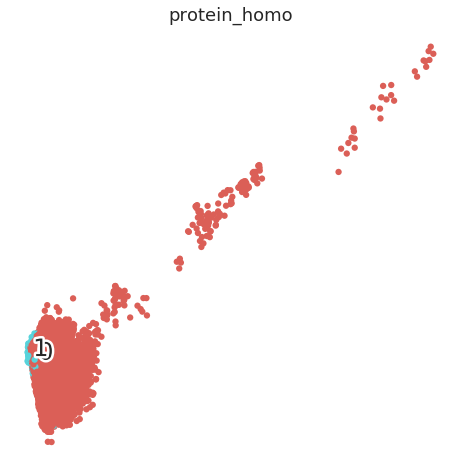

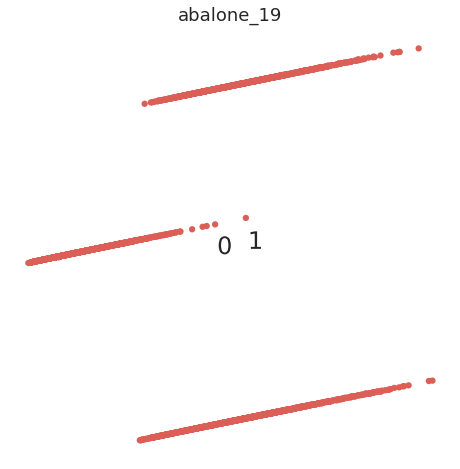

In [10]:
for dataset_name in dataset.keys():
    investigate_dataset(dataset_name, dataset)

Dataset:  ecoli
X summary:  ecoli


,0,1,2,3,4,5,6
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35


,0,1,2,3,4,5,6
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


y summary:  ecoli


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,336.000000
mean,-0.791667
std,0.611864
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.5161681  0.2442034  0.08419874 0.07413522]



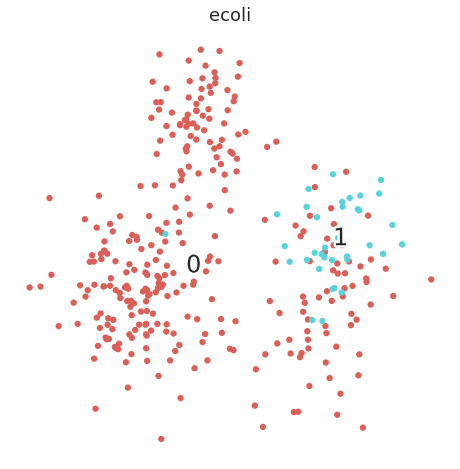

In [11]:
investigate_dataset('ecoli', dataset)

In [12]:
from src.lekayla.models.generative import CGAN
from src.lekayla.models.generative import VAE
from src.lekayla.models.generative import SMOTE
from src.lekayla.data import DatasetGenerator


from sklearn.model_selection import train_test_split

def generate_samples(dataset_name, dataset=None, n_samples=64):
    
    # using multi line document string as a hack multiline comment
    """
    X = pd.DataFrame(dataset[dataset_name]['data'])
    y = pd.DataFrame(dataset[dataset_name]['target'])
    
    # use 0 and 1 for the class instead of -1 and 1
    y_abs = np.array([0 if yval < 0 else yval for yval in y[0]])

    X_train, X_test, y_train, y_test = train_test_split(X.values, y_abs, test_size=0.33, stratify=y_abs, random_state=168)
    
    scaler = StandardScaler() # RobustScaler() 
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    
    cgan = CGAN(latent_dim=100)
    cgan.fit(scaled_X_train, y_train, n_epochs=1000, batch_size=64)
    # assuming the class is 1 for minority class
    cgan_samples = cgan.generate_samples(1, n_samples=n_samples)
    
    # for VAE just using the minority data only to create the samples
    vae = VAE()
    #X_train_minority = X_train[:][np.where(y_train==1)]
    #y_train_minority = y_train[np.where(y_train==1)]
    
    vae.fit(scaled_X_train, y_train)
    vae_samples = vae.generate_samples(n_samples=n_samples)
    
    smote = SMOTE()
    smote.fit(scaled_X_train, y_train)
    smote_samples = smote.generate_samples(n_samples=n_samples)
    
    """
    datagen = DatasetGenerator()
    scale = 2
    cgan_samples,_,_,_ = datagen.generate(dataset_name, scale, False, sampler=CGAN(latent_dim=100))
    vae_samples,_,_,_ = datagen.generate(dataset_name, scale, False, sampler=VAE())
    smote_samples,_,_,_ = datagen.generate(dataset_name, scale, False, sampler=SMOTE())
    
    return (cgan_samples, vae_samples, smote_samples)
    

Using TensorFlow backend.


In [13]:
cgan_samples, vae_samples, smote_samples = generate_samples('ecoli', n_samples=336)

Number of samples to be generated 46


/home/mulcahym/anaconda3/envs/MScAI/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/home/mulcahym/anaconda3/envs/MScAI/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/mulcahym/anaconda3/envs/MScAI/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/home/mulcahym/anaconda3/envs/MScAI/lib/python3.7/site-

loss real: 0.691, acc real: 0.625 | loss fake: 0.694, acc fake: 0.375 | loss gan: 0.693, acc gan: 0.500
loss real: 0.685, acc real: 0.875 | loss fake: 0.696, acc fake: 0.156 | loss gan: 0.689, acc gan: 0.906
loss real: 0.683, acc real: 0.844 | loss fake: 0.699, acc fake: 0.062 | loss gan: 0.687, acc gan: 0.844
loss real: 0.682, acc real: 0.750 | loss fake: 0.706, acc fake: 0.156 | loss gan: 0.678, acc gan: 0.938
loss real: 0.674, acc real: 0.906 | loss fake: 0.710, acc fake: 0.125 | loss gan: 0.673, acc gan: 0.969
loss real: 0.670, acc real: 0.750 | loss fake: 0.710, acc fake: 0.250 | loss gan: 0.679, acc gan: 0.812
loss real: 0.620, acc real: 1.000 | loss fake: 0.731, acc fake: 0.000 | loss gan: 0.680, acc gan: 0.781
loss real: 0.679, acc real: 0.781 | loss fake: 0.703, acc fake: 0.344 | loss gan: 0.680, acc gan: 0.778
loss real: 0.681, acc real: 0.688 | loss fake: 0.703, acc fake: 0.281 | loss gan: 0.712, acc gan: 0.000
loss real: 0.682, acc real: 0.719 | loss fake: 0.702, acc fake: 

Epoch 27/30
23/23 [==============================] - 0s 2ms/step - loss: 9.1868 - rec_loss: 8.6326 - kl_loss: 0.5543
Epoch 28/30
23/23 [==============================] - 0s 1ms/step - loss: 9.5603 - rec_loss: 9.0199 - kl_loss: 0.5403
Epoch 29/30
23/23 [==============================] - 0s 2ms/step - loss: 9.9120 - rec_loss: 9.3850 - kl_loss: 0.5270
Epoch 30/30
23/23 [==============================] - 0s 2ms/step - loss: 8.7495 - rec_loss: 8.2354 - kl_loss: 0.5141
Number of samples to be generated 46


In [14]:
#investigate_dataset('ecoli', dataset)

    
def describe_samples(dataset_name, dataset, cgan_samples, vae_samples, smote_samples):
    
    print('Dataset: ', dataset_name)
    
    print('X summary: ', dataset_name)
    X = dataset[dataset_name]['data']
    X_df = pd.DataFrame(X)
    y = dataset[dataset_name]['target']
    y_df = pd.DataFrame(y)
    
    # give example of dataframe, and then describe it
    
    display(X_df.head())
    display(X_df.describe())
    
    print('y summary: ', dataset_name)
    display(y_df.head())
    display(y_df.describe())
    
    classes = set(y)
    num_minority = y[y==max(classes)].shape[0]
    num_majority = y[y==min(classes)].shape[0]
    print("Number Minority Samples: ", num_minority)
    print("Number Majority Samples: ", num_majority)
    print("Ratio: ", num_minority/num_majority)
    
    c = pd.DataFrame(cgan_samples)
    display(c.head())
    display(c.describe())
    
    
    v = pd.DataFrame(vae_samples)
    display(v.head())
    display(v.describe())
    
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X)
    
    #cgan_samples, vae_samples = generate_samples(dataset_name,dataset)
    
    X = np.vstack((scaled_X, cgan_samples))
    
    print(X.shape)
    print(y.shape)
    
    y_twos = np.ones((cgan_samples.shape[0], 1)) * 2
    y = np.vstack((y_df, y_twos))

    print(X.shape)
    print(y.shape)
    
    X = np.vstack((X, vae_samples))
    
    y_threes = np.ones((vae_samples.shape[0], 1)) * 3
    y = np.vstack((y, y_threes))
    
    print(X.shape)
    print(y.shape)
    
    X = np.vstack((X, smote_samples))
    
    y_fours = np.ones((smote_samples.shape[0], 1)) * 4
    y = np.vstack((y, y_fours))

    print(X.shape)
    print(y.shape)
    plot_pca(dataset_name, X, y)


Dataset:  ecoli
X summary:  ecoli


,0,1,2,3,4,5,6
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35


,0,1,2,3,4,5,6
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


y summary:  ecoli


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,336.000000
mean,-0.791667
std,0.611864
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Number Minority Samples:  35
Number Majority Samples:  301
Ratio:  0.11627906976744186


,0,1,2,3,4,5,6
0,0.991467,0.817937,-0.102232,0.968954,0.999986,0.999999,0.999768
1,0.985003,0.803015,-0.021900,0.971309,0.999969,0.999967,0.987614
2,0.995540,0.776033,-0.205493,0.828260,0.999995,0.999996,0.999582
3,0.994496,0.541545,-0.739513,0.912363,0.999985,0.999960,0.985996
4,0.996089,0.805485,-0.370242,0.945608,0.999996,0.999991,0.998288


,0,1,2,3,4,5,6
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.987358,0.763610,-0.328997,0.923983,0.999948,0.999982,0.995061
std,0.010791,0.100787,0.240711,0.066776,0.000072,0.000022,0.005569
min,0.948796,0.517841,-0.769564,0.678712,0.999585,0.999908,0.973795
25%,0.985114,0.698532,-0.494239,0.909221,0.999950,0.999977,0.993958
50%,0.990903,0.794821,-0.358017,0.955001,0.999969,0.999992,0.996923
75%,0.994460,0.844038,-0.170664,0.967510,0.999985,0.999996,0.998563
max,0.998301,0.909747,0.283778,0.989260,0.999997,0.999999,0.999768


,0,1,2,3,4,5,6
0,0.353738,0.337719,-0.166133,-0.247361,0.529356,0.820098,0.099568
1,0.229120,-0.319119,0.367159,0.305155,-0.015138,-0.393119,-0.259239
2,0.332350,0.272877,-0.115221,-0.173475,0.437784,0.753505,0.108690
3,0.312853,-0.453782,0.533239,0.442635,-0.038260,-0.573753,-0.398738
4,0.330000,0.221791,-0.331595,-0.311894,0.663452,0.287690,-0.181462


,0,1,2,3,4,5,6
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.378544,-0.084475,0.188269,0.088223,0.257449,-0.005005,-0.159139
std,0.225026,0.337173,0.343691,0.358009,0.248820,0.564249,0.250253
min,0.044071,-0.785266,-0.547708,-0.679223,-0.079874,-0.877215,-0.710729
25%,0.219208,-0.286719,-0.064996,-0.131679,0.048161,-0.395198,-0.301106
50%,0.323305,-0.079441,0.125834,-0.003378,0.179909,-0.107955,-0.151789
75%,0.533314,0.148399,0.478880,0.277377,0.443330,0.499476,0.046122
max,0.853591,0.551520,0.829371,0.918299,0.879473,0.943378,0.262448


(382, 7)
(336,)
(382, 7)
(382, 1)
(428, 7)
(428, 1)
(474, 7)
(474, 1)
Variance explained per principal component: [0.37462288 0.18676357 0.1483624  0.10779832]



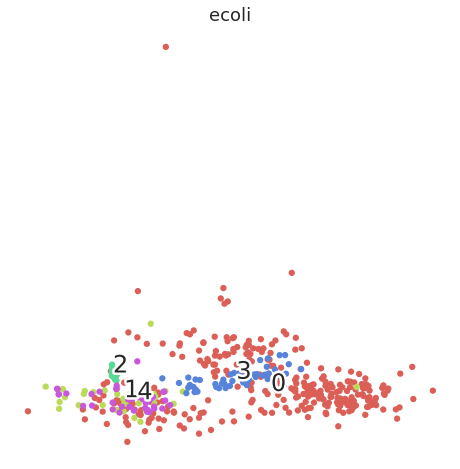

In [15]:
describe_samples('ecoli', dataset, cgan_samples, vae_samples, smote_samples)

In [16]:
y_t = dataset[dataset_name]['target']
classes= set(y_t)
print(max(classes))
#y_t[y_t == np.max(y_t)].shape[0]

num_minority = y_t[y_t==max(classes)].shape[0]
num_majority = y_t[y_t==min(classes)].shape[0]
print("Number Minority Samples: ", num_minority)
print("Number Majority Samples: ", num_majority)
print("Ratio: ", num_minority/num_majority)

1
Number Minority Samples:  32
Number Majority Samples:  4145
Ratio:  0.007720144752714113


In [17]:
Xcc = pd.read_csv("./data/creditcard.csv")

In [18]:
Xcc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
Xcc.iloc[:,:-1]
Xcc.iloc[:,-1:]

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [20]:
Xpp = pd.DataFrame(dataset['ecoli']['data'])
ypp = pd.DataFrame(dataset['ecoli']['target'])

# use 0 and 1 for the class instead of -1 and 1
#y_abs = np.array([0 if yval < 0 else yval for yval in y[0]])

Xpp_train, Xpp_test, ypp_train, ypp_test = train_test_split(Xpp.values, ypp, test_size=0.33, stratify=ypp, random_state=168)


In [21]:
ypp_test

,0
291,-1
244,1
157,-1
199,-1
307,-1
...,...
110,-1
325,-1
146,-1
306,-1
